In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import sem


from scipy.stats import f_oneway
from scikit_posthocs import posthoc_tukey

%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def generate_heatmap(data_heatmap, lengthsize):
    """Heatmap of a dataframe from post hoc test of scikit_posthoc"""
    colors = ['darkgreen', 'green', 'lightgreen', 'grey']
    thresholds = [0, 0.001, 0.01, 0.05, 1]  # Set the thresholds for each color

    custom_cmap = mpl.colors.ListedColormap(colors)
    bounds = [thresholds[0]] + thresholds[1:-1] + [thresholds[-1]]
    norm = mpl.colors.BoundaryNorm(bounds, custom_cmap.N)

    mask = np.triu(np.ones_like(data_heatmap, dtype=bool))

    annot_kws = {"size": lengthsize + 3}  # Adjust the size as per your requirement
    fig, ax = plt.subplots(figsize=(lengthsize, lengthsize * 0.75), dpi=200)

    heatmap = sns.heatmap(data_heatmap, cmap=custom_cmap, norm=norm, mask=mask,
                          annot=True, vmin=0, vmax=1, annot_kws=annot_kws)
    heatmap.set_title('Heatmap', fontdict={'fontsize': lengthsize * 3.2}, pad=16)
    ax.tick_params(axis='both', which='major', labelsize=lengthsize * 3)
    plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.show()

# Loading df

In [3]:
df = pd.read_csv('data/gh2ax loci count all.csv')
df.head()

Slice  Count  Total Area  \
0  controle 1 - dapi - pfak - gamma - 1_Out-1.czi...      2       2.294   
1  controle 1 - dapi - pfak - gamma - 2_Out-1.czi...     29       8.267   
2  controle 1 - dapi - pfak - gamma - 3_Out-1.czi...     24       5.385   
3  controle 2 - dapi - pfak - gamma - 1_Out-1.czi...      3       0.782   
4  controle 2 - dapi - pfak - gamma - 2_Out-1.czi...      9       3.921   

   Average Size  %Area   Mean   IntDen tto        data  
0         1.147  0.562  255.0  292.522  ct  2020_06_09  
1         0.285  0.959  255.0   72.688  ct  2020_06_10  
2         0.224  1.071  255.0   57.214  ct  2020_06_11  
3         0.261  0.209  255.0   66.448  ct  2020_06_12  
4         0.436  1.120  255.0  111.100  ct  2020_06_13

# Aggregations

In [4]:

tto_list = ['ct_sc', 'ct_sifak', 'dox_sc', 'dox_sifak']
df_slice = df[df['tto'].isin(tto_list)]
df_sifak = df_slice[['tto', 'Count']]
sifak_agg = df_sifak.groupby('tto').agg({'Count': [np.mean, np.std, 'sem', 'count']})

#gh2ax foci counts
ct_sc = df_sifak[df_sifak['tto']=='ct_sc']['Count']
ct_sifak = df_sifak[df_sifak['tto']=='ct_sifak']['Count']
dox_sc = df_sifak[df_sifak['tto']=='dox_sc']['Count']
dox_sifak = df_sifak[df_sifak['tto']=='dox_sifak']['Count']

In [5]:
sifak_agg

Count                           
                mean        std       sem count
tto                                            
ct_sc       3.183673   1.844739  0.263534    49
ct_sifak    6.705882   5.397385  0.755785    51
dox_sc     52.864865  17.472458  2.872454    37
dox_sifak  49.047619  17.655169  2.724252    42

# ANOVA e post-hoc Tukey

In [32]:
from scipy.stats import f_oneway
from scikit_posthocs import posthoc_tukey
# Create an empty dictionary to store the arrays for each 'tto' group
count_arrays = {}

# Iterate over each 'tto' group
for tto_group, group_df in df_sifak.groupby('tto'):
    count_arrays[tto_group] = group_df['Count'].values

count_values = list(count_arrays.values())

#  ANOVA one way
f_statistic, p_value = f_oneway(*count_values)

print("ANOVA results:")
print("F-statistic:", f_statistic)
print("rounded p-value:", format(p_value, '.4f'))  # Round p-value to 4 decimals after the comma
print("p-value:", p_value)

tukey_df = posthoc_tukey(df_sifak, val_col="Count", group_col="tto")
tukey_df

ANOVA results:
F-statistic: 214.58058949795662
rounded p-value: 0.0000
p-value: 2.183899166006568e-58


ct_sc  ct_sifak    dox_sc  dox_sifak
ct_sc      1.000000  0.463957  0.001000   0.001000
ct_sifak   0.463957  1.000000  0.001000   0.001000
dox_sc     0.001000  0.001000  1.000000   0.497525
dox_sifak  0.001000  0.001000  0.497525   1.000000

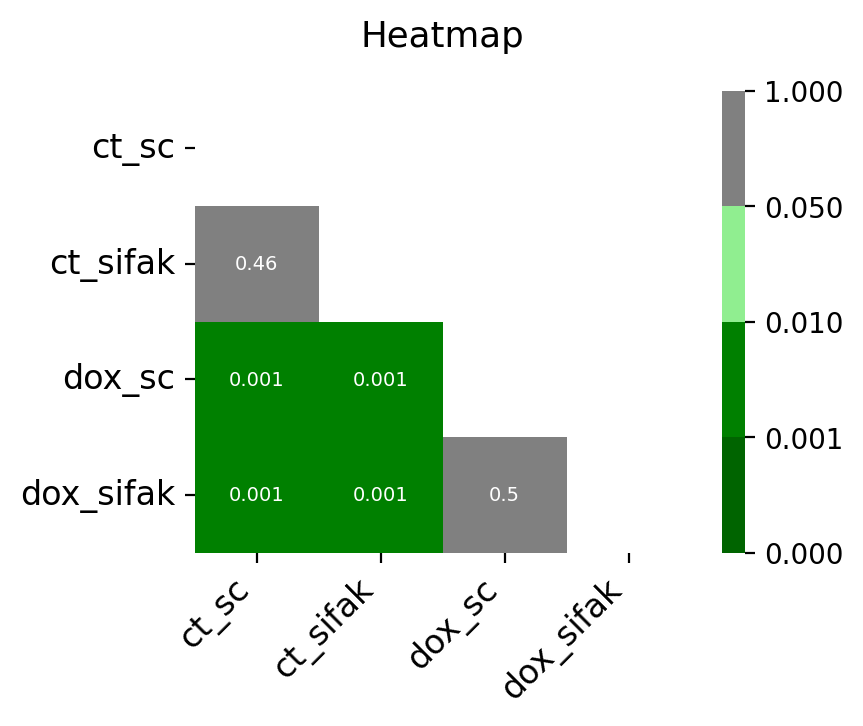

In [7]:
generate_heatmap(tukey_df, 4)

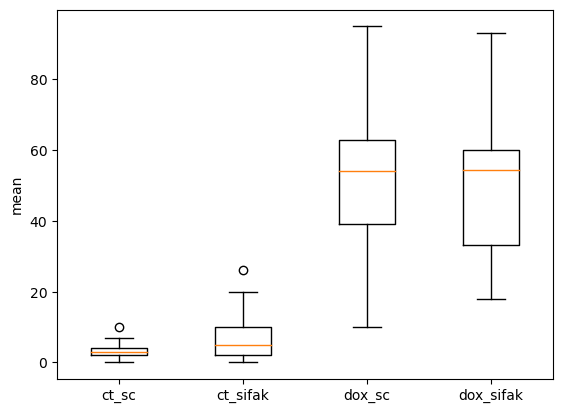

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -3.522     0.463    -9.772     2.728
 (0 - 2)    -49.681     0.000   -56.486   -42.876
 (0 - 3)    -45.864     0.000   -52.434   -39.294
 (1 - 0)      3.522     0.463    -2.728     9.772
 (1 - 2)    -46.159     0.000   -52.906   -39.412
 (1 - 3)    -42.342     0.000   -48.852   -35.832
 (2 - 0)     49.681     0.000    42.876    56.486
 (2 - 1)     46.159     0.000    39.412    52.906
 (2 - 3)      3.817     0.498    -3.227    10.862
 (3 - 0)     45.864     0.000    39.294    52.434
 (3 - 1)     42.342     0.000    35.832    48.852
 (3 - 2)     -3.817     0.498   -10.862     3.227



In [9]:
from scipy.stats import tukey_hsd

fig, ax = plt.subplots(1, 1)
ax.boxplot([ct_sc, ct_sifak, dox_sc, dox_sifak])
ax.set_xticklabels(["ct_sc", "ct_sifak", 'dox_sc', 'dox_sifak']) 
ax.set_ylabel("mean") 
plt.show()

res = tukey_hsd(ct_sc, ct_sifak,dox_sc, dox_sifak)
print(res)

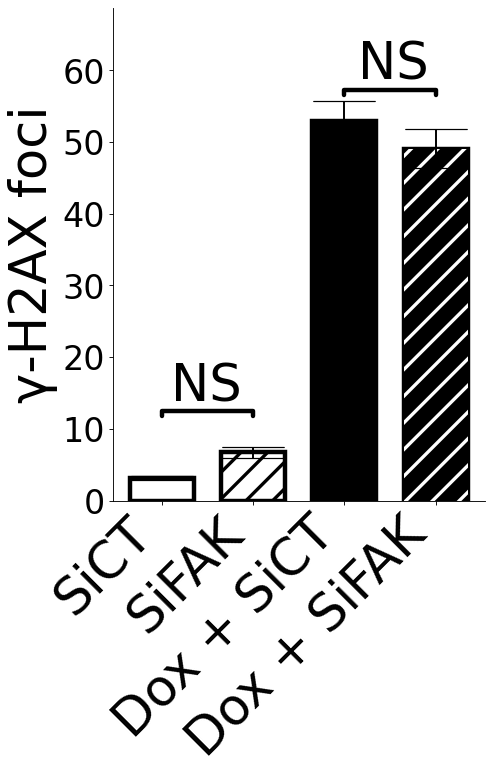

In [12]:
# dados

grupos = [ct_sc, ct_sifak, dox_sc, dox_sifak]
means = sifak_agg['Count']['mean']
erros = sifak_agg['Count']['sem']

# Set the figure filename
figure_name = 'sifak gh2ax loci countmean anova-tukey'

cores_barras = ['white', 'white', 'black', 'black']
cor_envolta = ["black", 'white'] #cor da linha envolta das barras
espessura_volta = 4   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'γ-H2AX foci' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['SiCT', 'SiFAK', 'Dox + SiCT', 'Dox + SiFAK'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

# remover normalização
means_normalizado = means
erros_normalizado = erros

def traco(text,X,Y,barhight,texthight,xtext):
    x = (X[0]+X[1])/2
    y = 1.295* max(Y[0], Y[1])+barhight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x+xtext # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(means_normalizado)+texthight), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

plt.rcParams['hatch.linewidth'] = 3 # regula a espessura das linhas dentro das barras

x = [1, 2, 3, 4]  # localização da barra
width = 0.7# espessura da barra

fig, ax = plt.subplots(figsize=(6,8), dpi=80)
barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= cores_barras[0] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= cores_barras[1] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= cores_barras[2] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= cores_barras[3] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[3])

barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= 'None', hatch='',edgecolor= cor_envolta, linewidth= 0, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= 'None', hatch='/'*1,edgecolor= cor_envolta, linewidth= 0, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= 'None', hatch='',edgecolor= cor_envolta[1], linewidth= 0, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= 'None', hatch='/'*1,edgecolor= cor_envolta[1], linewidth= 0, label= labels[3])

# chamando def para os traços

traco("NS",x[0:2],means_normalizado[0:2],0,-.1,-.4)
# traco(ttesting(grupos[1],grupos[2]), (x[1], x[2]), (means_normalizado[1],means_normalizado[2]), 1, -1,-.55)
traco("NS",x[2:4],means_normalizado[2:4],-15,0,-.35)
# traco(ttesting(grupos[0],grupos[3]), (x[0], x[3]), (means_normalizado[0],means_normalizado[3]), 2, 2.5,-.5)

plt.ylim(0,1.3* max(means_normalizado))
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
plt.yticks(fontsize=Tamanho_ticks_Y)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X, rotation=45, ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the figure in PDF, JPEG, and PNG formats
plt.savefig(f'{figure_name}.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{figure_name}.jpeg', bbox_inches='tight', dpi=300)
plt.savefig(f'{figure_name}.png', bbox_inches='tight', dpi=300, transparent=True)


plt.show()

In [ ]:
tto_list = ['ct_sc', 'ct_sifak', 'dox_sc', 'dox_sifak']
df_slice = df[df['tto'].isin(tto_list)]
df_sifak = df_slice[['tto', 'Count']]
sifak_agg = df_sifak.groupby('tto').agg({'Count': [np.mean, np.std, 'sem', 'count']})

#gh2ax foci counts
ct_sc = df_sifak[df_sifak['tto']=='ct_sc']['Count']
ct_sifak = df_sifak[df_sifak['tto']=='ct_sifak']['Count']
dox_sc = df_sifak[df_sifak['tto']=='dox_sc']['Count']
dox_sifak = df_sifak[df_sifak['tto']=='dox_sifak']['Count']

# Checando normalidade

In [105]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

def teste_normalidade(x):
    # Plotting the histogram with KDE line
    plt.subplot(1, 2, 1)
    plt.rcParams["figure.figsize"] = (8, 4)
    ax = sns.histplot(x, kde=True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='x', width=0.5, color='gray')
    ax.tick_params(axis='y', width=0.5, color='gray')

    # Plotting the QQ-plot
    plt.subplot(1, 2, 2)
    pg.qqplot(x, dist='norm')
    
    # Calculating skewness and kurtosis
    print('Sample size:', len(x))
    print('Skewness:', stats.skew(x), '(The farther from zero, the less normal)')
    print('Kurtosis:', stats.kurtosis(x))

    # Shapiro-Wilk test (may not work well with many identical values)
    W, p = stats.shapiro(x)
    print('Shapiro-Wilk: W={0}, p={1}'.format(W, p), '(if p > 0.05, it is normal)')

    # Kolmogorov-Smirnov test
    D, p = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()), N=len(x))
    print('Kolmogorov-Smirnov: D={0}, p={1}'.format(D, p), '(if p > 0.05, it is normal)')

    # Anderson-Darling test
    ad_stat, ad_critical, ad_theoretical = stats.anderson(x, dist='norm')
    print('Anderson-Darling: T={0}, p(0.05)={1}'.format(ad_stat, ad_critical[2]), '(if p > 0.05, it is normal)')
    print('Anderson-Darling critical values:', ad_critical)
    print('Anderson-Darling percentages:', ad_theoretical)

Sample size: 49
Skewness: 1.2362080825396928 (The farther from zero, the less normal)
Kurtosis: 2.2760722337481916
Shapiro-Wilk: W=0.8927633762359619, p=0.00032155567896552384 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.21312498831982557, p=0.019695618693309935 (if p > 0.05, it is normal)
Anderson-Darling: T=1.733459001076703, p(0.05)=0.735 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.538 0.612 0.735 0.857 1.019]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


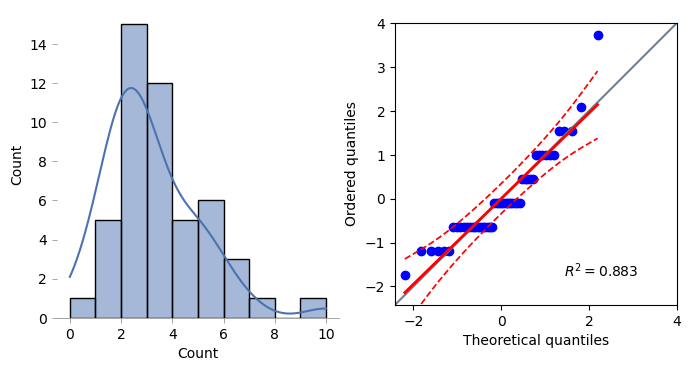

In [106]:
teste_normalidade(ct_sc)

Sample size: 51
Skewness: 1.2023574079079824 (The farther from zero, the less normal)
Kurtosis: 1.7809419773652477
Shapiro-Wilk: W=0.8971706032752991, p=0.0003388281329534948 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.13382437308408068, p=0.2936630057899483 (if p > 0.05, it is normal)
Anderson-Darling: T=1.2692025214793645, p(0.05)=0.736 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.539 0.614 0.736 0.859 1.022]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


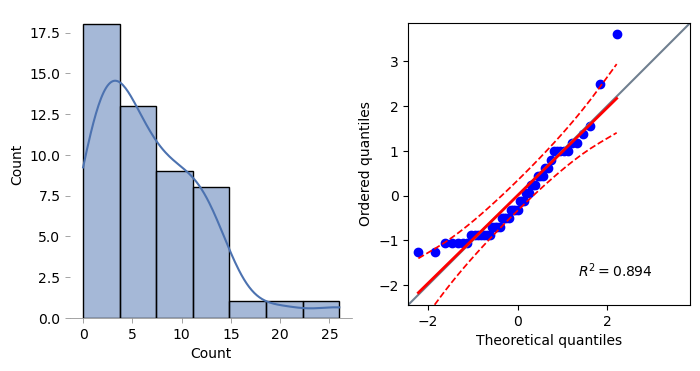

In [107]:
teste_normalidade(ct_sifak)

In [108]:
stats.mannwhitneyu(ct_sc, ct_sifak)

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

MannwhitneyuResult(statistic=767.5, pvalue=0.0008078359137292897)

Sample size: 37
Skewness: 0.24219080821337682 (The farther from zero, the less normal)
Kurtosis: 0.4870403442807909
Shapiro-Wilk: W=0.9743180274963379, p=0.5373244285583496 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.09572171442983024, p=0.854971599959664 (if p > 0.05, it is normal)
Anderson-Darling: T=0.3741119769711645, p(0.05)=0.722 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.529 0.602 0.722 0.842 1.002]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


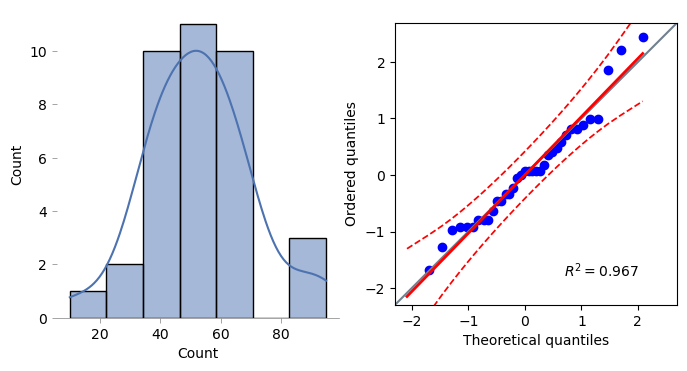

In [109]:
teste_normalidade(dox_sc)

Sample size: 42
Skewness: 0.021586659539371503 (The farther from zero, the less normal)
Kurtosis: -0.6218063973499168
Shapiro-Wilk: W=0.9538031816482544, p=0.08844207972288132 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.1361880163292874, p=0.38262676435313203 (if p > 0.05, it is normal)
Anderson-Darling: T=0.8609830377876904, p(0.05)=0.728 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.533 0.607 0.728 0.849 1.01 ]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


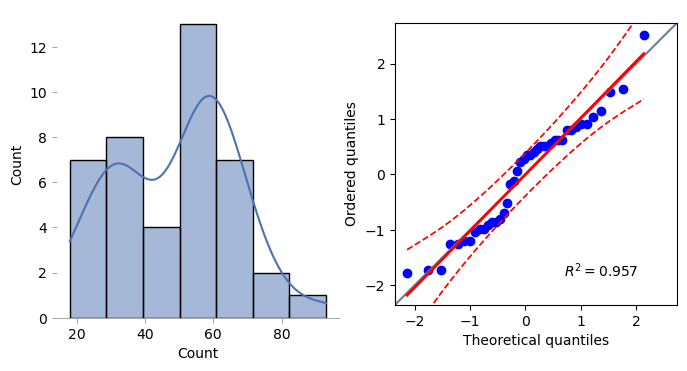

In [110]:
teste_normalidade(dox_sifak)

In [31]:
from scipy.stats import ttest_ind

ttest_group = [dox_sc.to_list() ,dox_sifak.to_list()]

stat, p = ttest_ind(ttest_group[0], ttest_group[1])
print('t=%.3f, p=%.5f' % (stat, p))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

pValue = convert_pvalue_to_asterisks(p)
print(convert_pvalue_to_asterisks(p))

t=0.964, p=0.33827
NS


# Não são todos normais, fazer Kruskal-Wallis (Em vez de ANOVA)

In [38]:
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# Create an empty dictionary to store the arrays for each 'tto' group
count_arrays = {}

# Iterate over each 'tto' group
for tto_group, group_df in df_sifak.groupby('tto'):
    count_arrays[tto_group] = group_df['Count'].values

count_values = list(count_arrays.values())

#  Kruskal-Willis
f_statistic, p_value = kruskal(*count_values)

print("Kruskal results:")
print("F-statistic:", f_statistic)
print("rounded p-value:", format(p_value, '.4f'))  # Round p-value to 4 decimals after the comma
print("p-value:", p_value)

dunn_df = posthoc_dunn(df_sifak, val_col="Count", group_col="tto")
dunn_df.round(3)

Kruskal results:
F-statistic: 134.4338878283344
rounded p-value: 0.0000
p-value: 5.990207342314148e-29


ct_sc  ct_sifak  dox_sc  dox_sifak
ct_sc      1.000     0.057   0.000      0.000
ct_sifak   0.057     1.000   0.000      0.000
dox_sc     0.000     0.000   1.000      0.755
dox_sifak  0.000     0.000   0.755      1.000

In [112]:
from scikit_posthocs import posthoc_mannwhitney

mannwhitney_df = posthoc_mannwhitney(df_sifak, val_col="Count", group_col="tto")
mannwhitney_df.round(4)

ct_sc  ct_sifak  dox_sc  dox_sifak
ct_sc      1.0000    0.0008   0.000      0.000
ct_sifak   0.0008    1.0000   0.000      0.000
dox_sc     0.0000    0.0000   1.000      0.455
dox_sifak  0.0000    0.0000   0.455      1.000

In [114]:
from scikit_posthocs import posthoc_conover

conover_df = posthoc_conover(df_sifak, val_col="Count", group_col="tto")
conover_df.round(4)

ct_sc  ct_sifak  dox_sc  dox_sifak
ct_sc      1.0000    0.0002  0.0000     0.0000
ct_sifak   0.0002    1.0000  0.0000     0.0000
dox_sc     0.0000    0.0000  1.0000     0.5325
dox_sifak  0.0000    0.0000  0.5325     1.0000

In [116]:
from scikit_posthocs import posthoc_nemenyi
nemenyi_df = posthoc_nemenyi(df_sifak, val_col="Count", group_col="tto")
nemenyi_df.round(4)

ct_sc  ct_sifak  dox_sc  dox_sifak
ct_sc      1.0000    0.3065  0.0000     0.0000
ct_sifak   0.3065    1.0000  0.0000     0.0000
dox_sc     0.0000    0.0000  1.0000     0.9921
dox_sifak  0.0000    0.0000  0.9921     1.0000

In [46]:
# from scikit_posthocs import posthoc_wilcoxon
# wilcoxon_df = posthoc_wilcoxon(df_sifak, val_col="Count", group_col="tto")
# wilcoxon_df.round(3)

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_2histograms(x, y):
    plt.figure(figsize=(8, 6))
    plt.hist([x, y], bins=30, label= ["1", "2"])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()


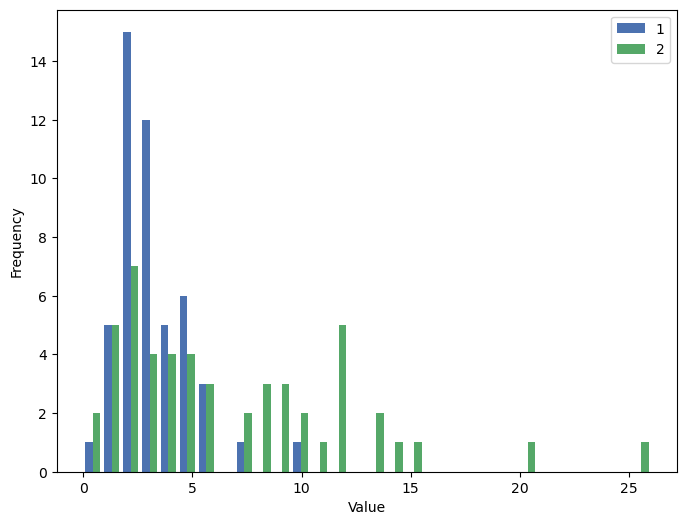

In [103]:
plot_2histograms(ct_sc,ct_sifak)

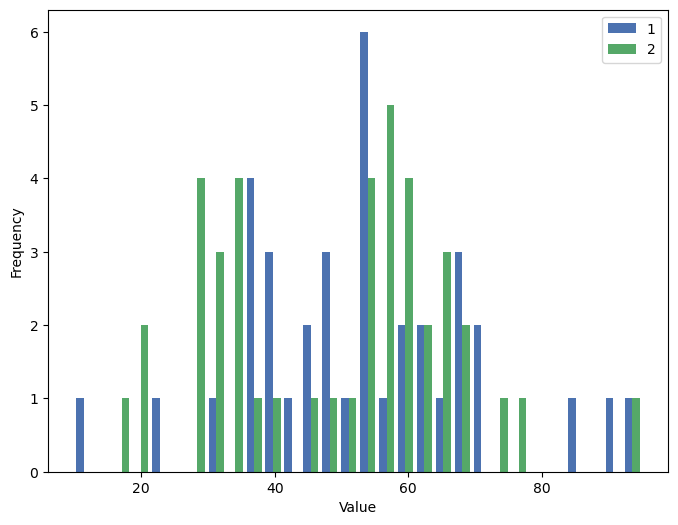

In [104]:
plot_2histograms(dox_sc,dox_sifak)

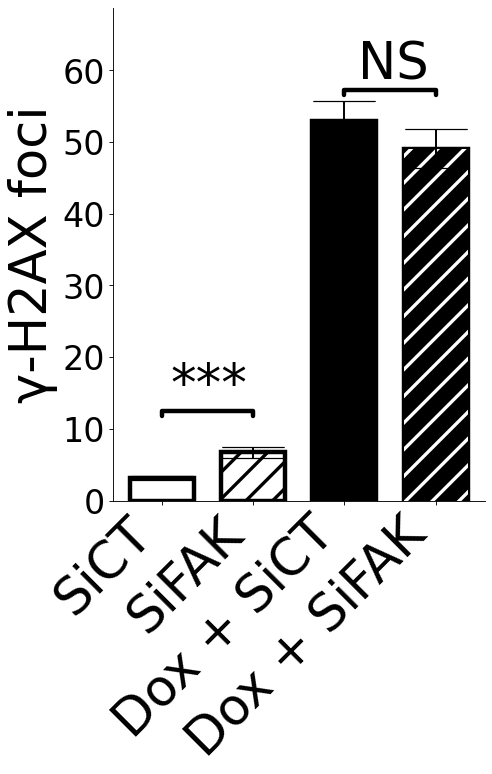

In [115]:
# dados

grupos = [ct_sc, ct_sifak, dox_sc, dox_sifak]
means = sifak_agg['Count']['mean']
erros = sifak_agg['Count']['sem']

# Set the figure filename
figure_name = 'sifak gh2ax loci countmean kruskal-conover'

cores_barras = ['white', 'white', 'black', 'black']
cor_envolta = ["black", 'white'] #cor da linha envolta das barras
espessura_volta = 4   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'γ-H2AX foci' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['SiCT', 'SiFAK', 'Dox + SiCT', 'Dox + SiFAK'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

# remover normalização
means_normalizado = means
erros_normalizado = erros

def traco(text,X,Y,barhight,texthight,xtext):
    x = (X[0]+X[1])/2
    y = 1.295* max(Y[0], Y[1])+barhight #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x+xtext # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(means_normalizado)+texthight), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################   

plt.rcParams['hatch.linewidth'] = 3 # regula a espessura das linhas dentro das barras

x = [1, 2, 3, 4]  # localização da barra
width = 0.7# espessura da barra

fig, ax = plt.subplots(figsize=(6,8), dpi=80)
barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= cores_barras[0] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= cores_barras[1] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= cores_barras[2] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= cores_barras[3] ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[3])

barra_1 = ax.bar(x[0], means_normalizado[0],yerr=erros_normalizado[0],  capsize =28, width= width, color= 'None', hatch='',edgecolor= cor_envolta, linewidth= 0, label= labels[0])
barra_2 = ax.bar(x[1], means_normalizado[1],yerr=erros_normalizado[1],  capsize =28, width= width, color= 'None', hatch='/'*1,edgecolor= cor_envolta, linewidth= 0, label= labels[1])
barra_3 = ax.bar(x[2], means_normalizado[2],yerr=erros_normalizado[2],  capsize =28, width= width, color= 'None', hatch='',edgecolor= cor_envolta[1], linewidth= 0, label= labels[2])
barra_4 = ax.bar(x[3], means_normalizado[3],yerr=erros_normalizado[3],  capsize =28, width= width, color= 'None', hatch='/'*1,edgecolor= cor_envolta[1], linewidth= 0, label= labels[3])

# chamando def para os traços

traco("***",x[0:2],means_normalizado[0:2],0,-.1,-.4)
# traco(ttesting(grupos[1],grupos[2]), (x[1], x[2]), (means_normalizado[1],means_normalizado[2]), 1, -1,-.55)
traco("NS",x[2:4],means_normalizado[2:4],-15,0,-.35)
# traco(ttesting(grupos[0],grupos[3]), (x[0], x[3]), (means_normalizado[0],means_normalizado[3]), 2, 2.5,-.5)

plt.ylim(0,1.3* max(means_normalizado))
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
plt.yticks(fontsize=Tamanho_ticks_Y)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X, rotation=45, ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the figure in PDF, JPEG, and PNG formats
plt.savefig(f'{figure_name}.pdf', bbox_inches='tight', dpi=300)
plt.savefig(f'{figure_name}.jpeg', bbox_inches='tight', dpi=300)
plt.savefig(f'{figure_name}.png', bbox_inches='tight', dpi=300, transparent=True)


plt.show()